In [1]:
%config IPCompleter.greedy=True

import os
import seaborn as sns
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
training_df = pd.read_csv('data/BATADAL_dataset03.csv', encoding="utf-8-sig",  delimiter=',', skipinitialspace=True)
testing_df = pd.read_csv('data/BATADAL_dataset04.csv', encoding="utf-8-sig",  delimiter=',', skipinitialspace=True)

In [31]:
training_df['DATETIME']=pd.to_datetime(training_df.DATETIME,errors='coerce')
testing_df['DATETIME']=pd.to_datetime(testing_df.DATETIME,errors='coerce')
training_df.head()
# testing_df.head()

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,2014-06-01 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
1,2014-06-01 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2,2014-06-01 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
3,2014-06-01 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
4,2014-06-01 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [33]:
testing_df.head()

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,2016-04-07 00:00:00,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,1.0,...,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64,-999
1,2016-04-07 01:00:00,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,1.0,...,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15,-999
2,2016-04-07 02:00:00,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,1.0,...,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56,-999
3,2016-04-07 03:00:00,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,1.0,...,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38,-999
4,2016-04-07 04:00:00,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,1.0,...,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04,-999


In [34]:
testing_df.L_T1

0       2.44
1       2.66
2       3.11
3       3.62
4       4.08
5       4.53
6       4.84
7       5.19
8       5.22
9       5.11
10      4.73
11      4.24
12      3.74
13      3.25
14      2.70
15      2.25
16      1.93
17      1.65
18      1.43
19      1.15
20      0.93
21      0.84
22      0.70
23      0.59
24      0.49
25      0.35
26      0.32
27      0.44
28      0.70
29      0.93
        ... 
4147    3.56
4148    3.35
4149    3.19
4150    2.96
4151    2.75
4152    2.59
4153    2.52
4154    2.62
4155    2.76
4156    3.05
4157    3.33
4158    3.46
4159    3.53
4160    3.78
4161    4.02
4162    4.21
4163    4.41
4164    4.62
4165    4.77
4166    4.82
4167    4.71
4168    4.23
4169    3.76
4170    3.31
4171    2.94
4172    2.65
4173    2.24
4174    1.91
4175    1.52
4176    1.10
Name: L_T1, Length: 4177, dtype: float64

In [4]:
## Create heatmap of correlations in dataset, with datetime and att_flag removed. Also remove any constants, since they don't have any effect
corr_df = training_df.copy()
corr_df = corr_df.drop(columns=['ATT_FLAG', 'DATETIME'])
constants = [x for x in corr_df if np.std(corr_df[x]) == 0]
corr_df = corr_df.drop(columns=constants)

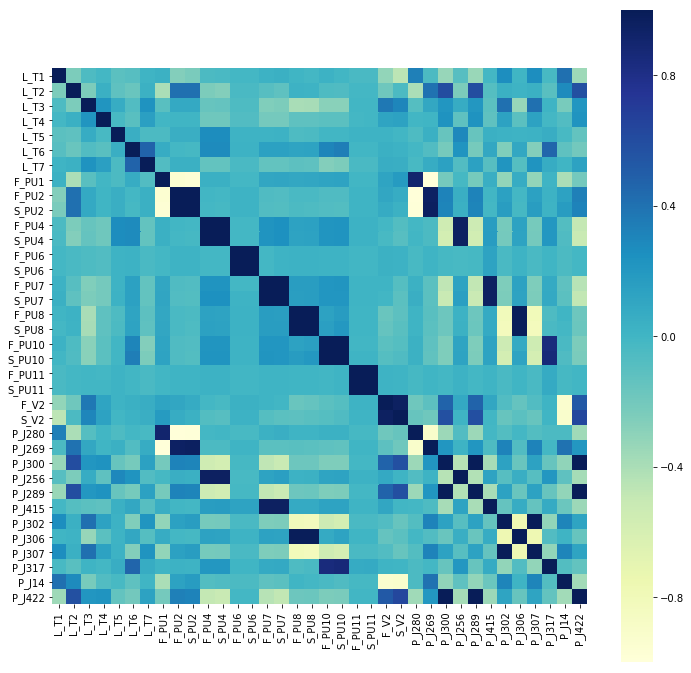

In [5]:
corr = corr_df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='YlGnBu',square=True, ax=ax)

In [29]:
print(list(testing_df))

['DATETIME', ' L_T1', ' L_T2', ' L_T3', ' L_T4', ' L_T5', ' L_T6', ' L_T7', ' F_PU1', ' S_PU1', ' F_PU2', ' S_PU2', ' F_PU3', ' S_PU3', ' F_PU4', ' S_PU4', ' F_PU5', ' S_PU5', ' F_PU6', ' S_PU6', ' F_PU7', ' S_PU7', ' F_PU8', ' S_PU8', ' F_PU9', ' S_PU9', ' F_PU10', ' S_PU10', ' F_PU11', ' S_PU11', ' F_V2', ' S_V2', ' P_J280', ' P_J269', ' P_J300', ' P_J256', ' P_J289', ' P_J415', ' P_J302', ' P_J306', ' P_J307', ' P_J317', ' P_J14', ' P_J422', ' ATT_FLAG']


In [7]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 45 columns):
DATETIME    8761 non-null datetime64[ns]
L_T1        8761 non-null float64
L_T2        8761 non-null float64
L_T3        8761 non-null float64
L_T4        8761 non-null float64
L_T5        8761 non-null float64
L_T6        8761 non-null float64
L_T7        8761 non-null float64
F_PU1       8761 non-null float64
S_PU1       8761 non-null int64
F_PU2       8761 non-null float64
S_PU2       8761 non-null int64
F_PU3       8761 non-null int64
S_PU3       8761 non-null int64
F_PU4       8761 non-null float64
S_PU4       8761 non-null int64
F_PU5       8761 non-null int64
S_PU5       8761 non-null int64
F_PU6       8761 non-null float64
S_PU6       8761 non-null int64
F_PU7       8761 non-null float64
S_PU7       8761 non-null int64
F_PU8       8761 non-null float64
S_PU8       8761 non-null int64
F_PU9       8761 non-null int64
S_PU9       8761 non-null int64
F_PU10      8761 non-null 

In [8]:
variables_to_use = ['L_T6', 'L_T2', 'F_PU1', 'S_PU10', 'P_J317','P_J280', 'P_J269', 'P_J422']

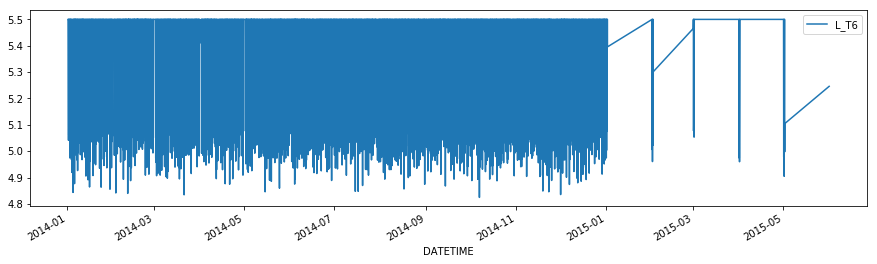

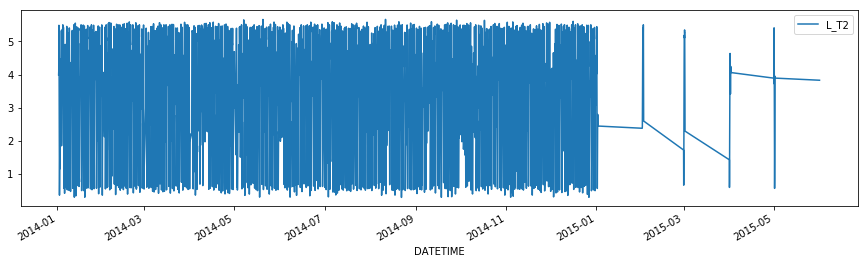

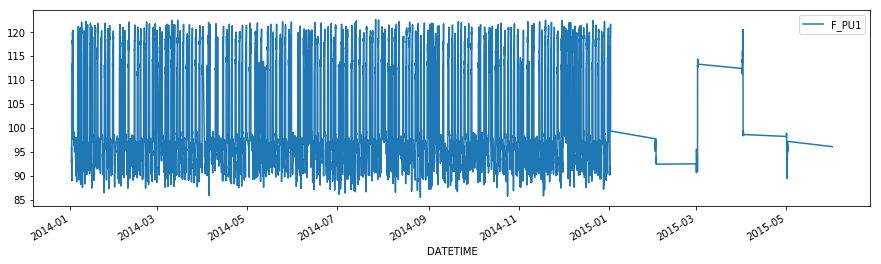

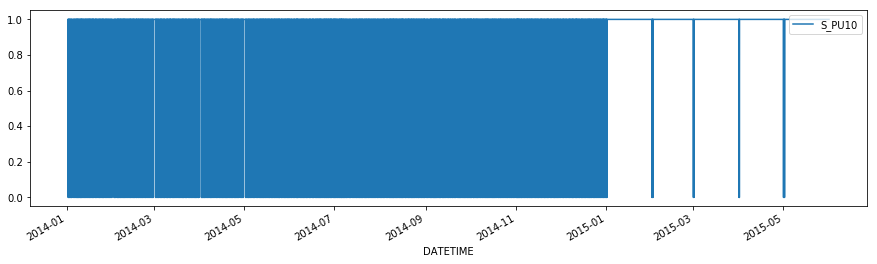

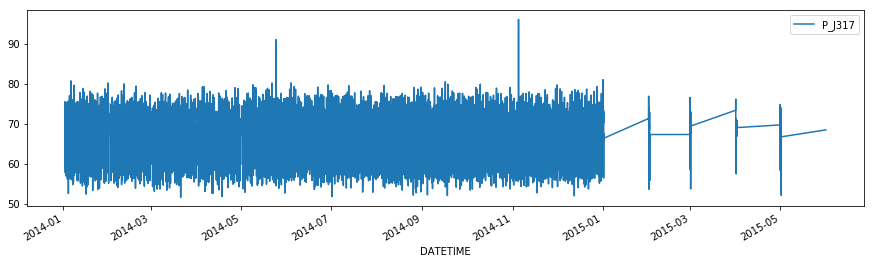

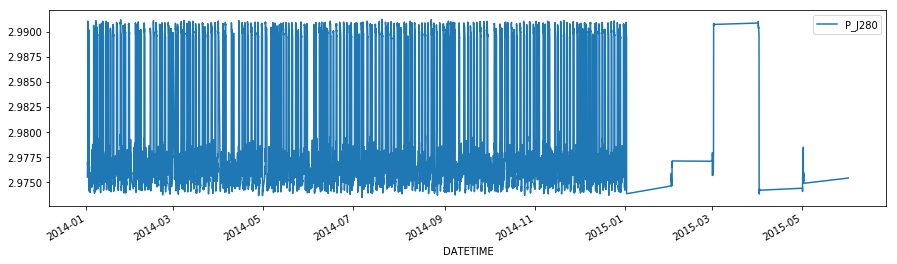

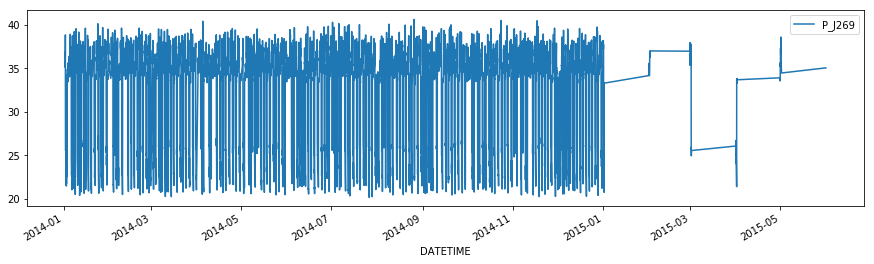

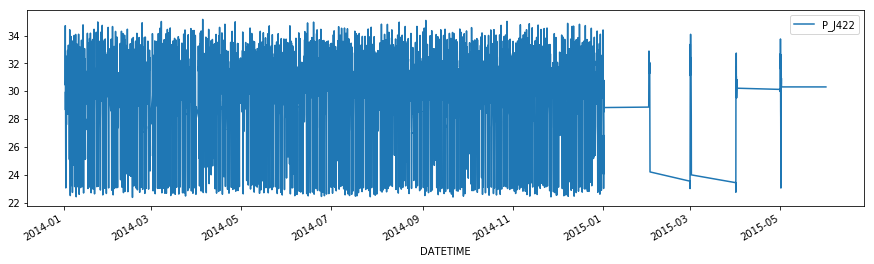

In [9]:
# Plot the data
for variable in variables_to_use:
    ax = training_df.plot(x='DATETIME', y=variable, figsize=(15, 4))
    ax.legend(loc='upper right');

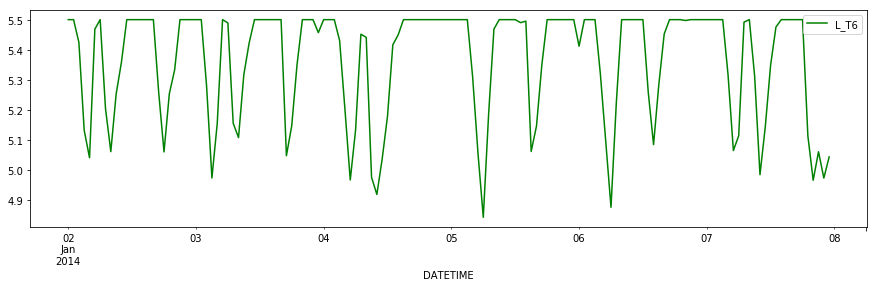

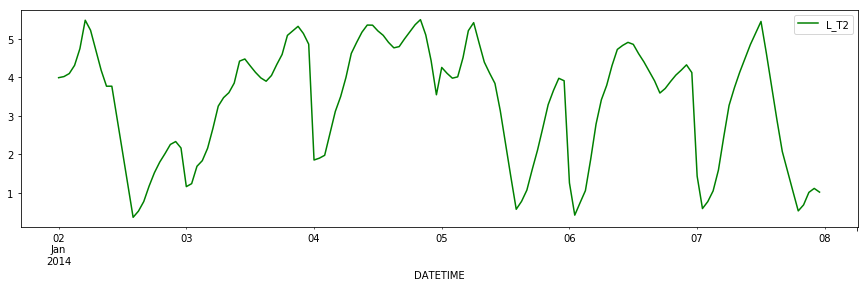

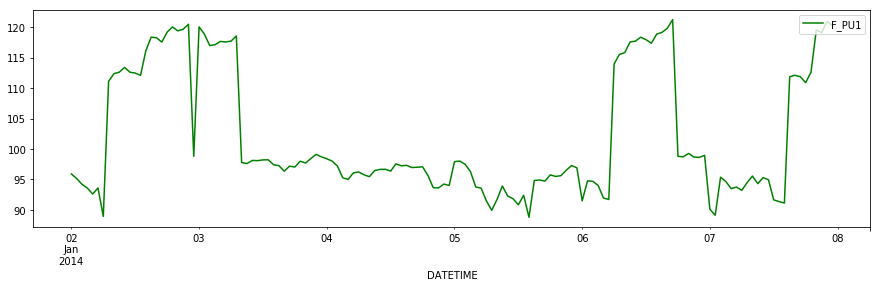

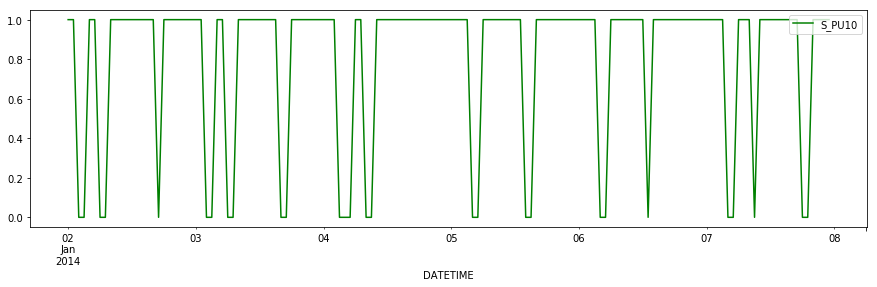

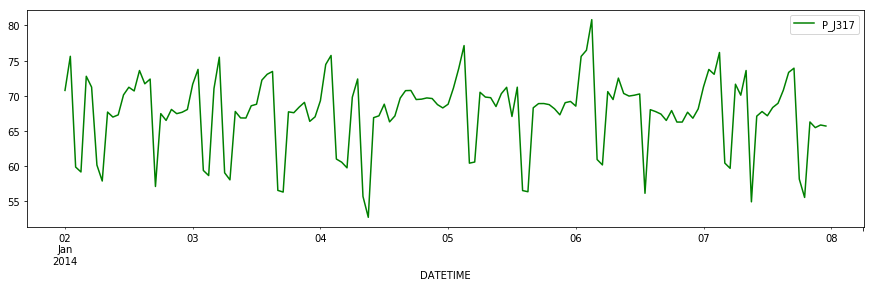

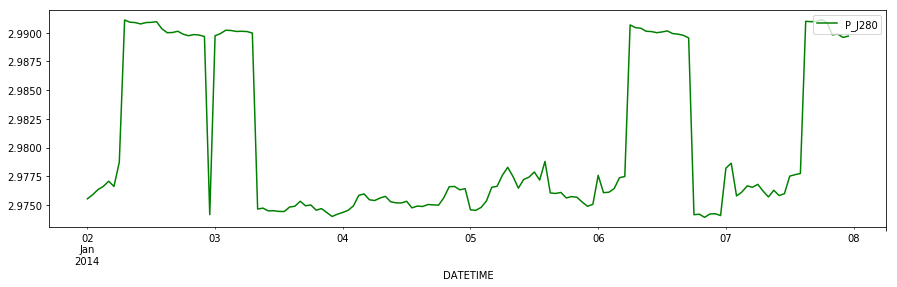

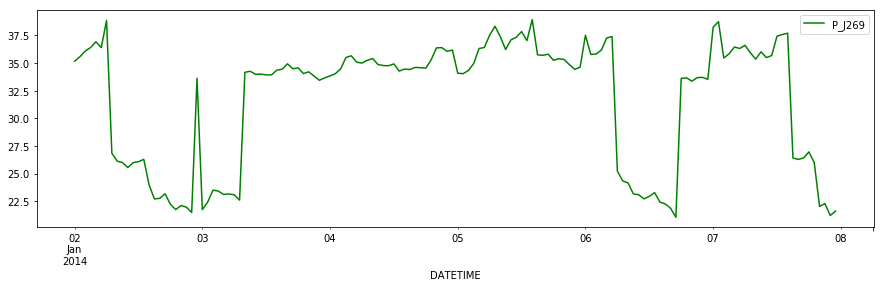

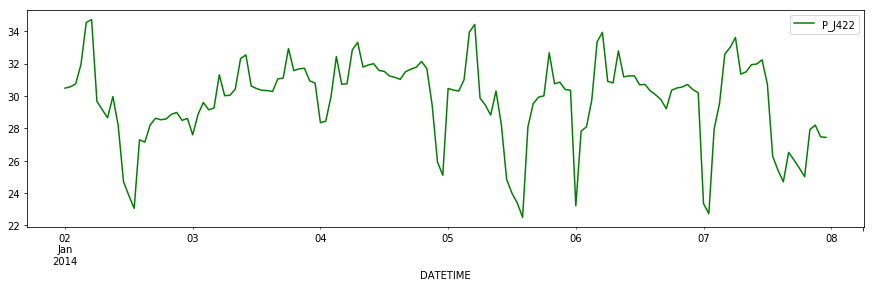

In [10]:
# Plot first 3 days of variable data
for variable in variables_to_use:
    selected_data = training_df[training_df['DATETIME'] < '2014-01-08 00:00:00']
    ax = selected_data.plot(x='DATETIME', y=variable, figsize=(15, 4), color='green')
    ax.legend(loc='upper right');

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


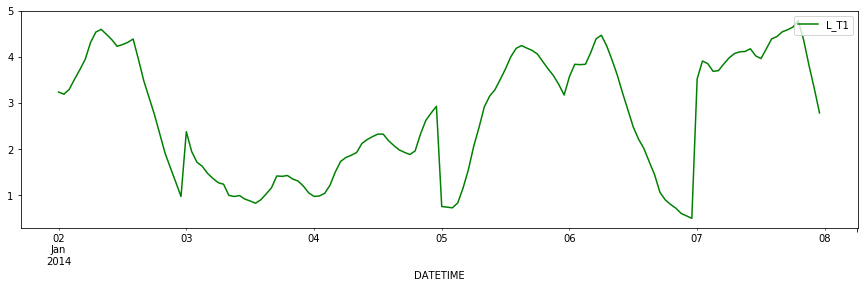

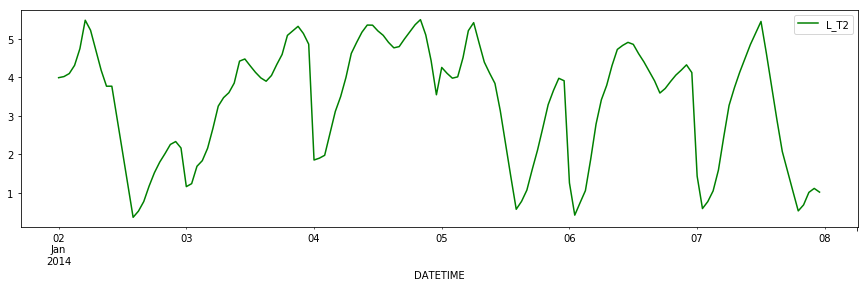

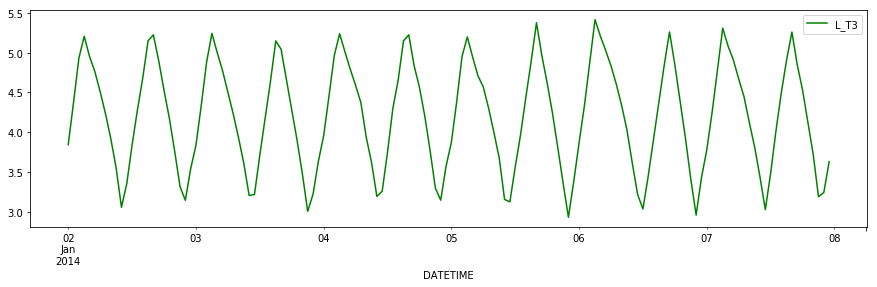

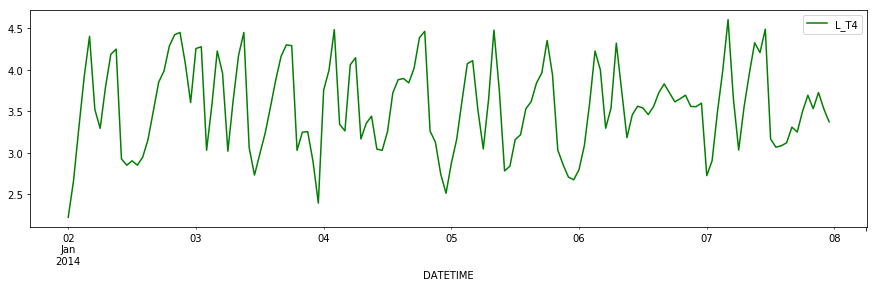

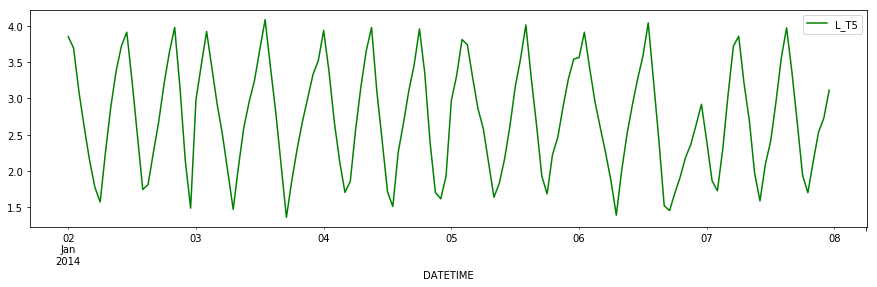

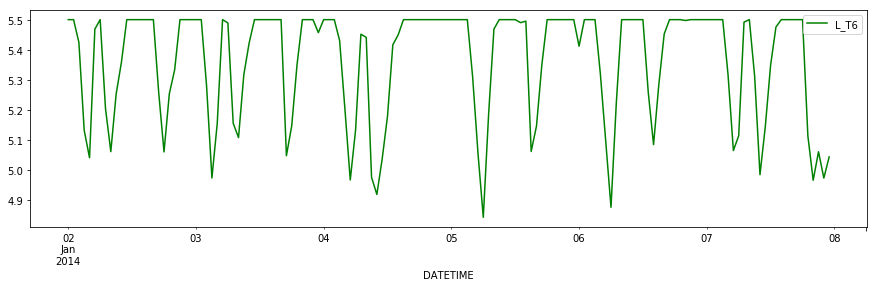

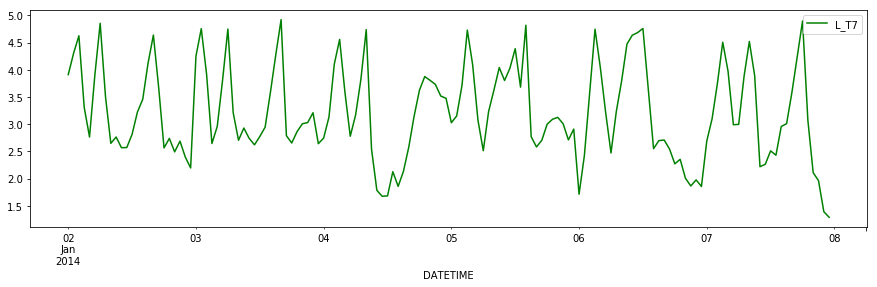

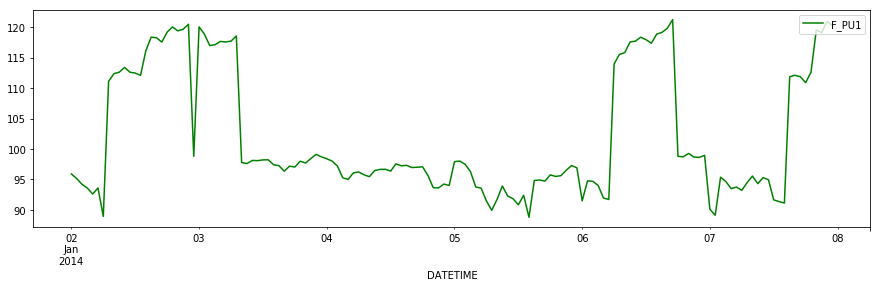

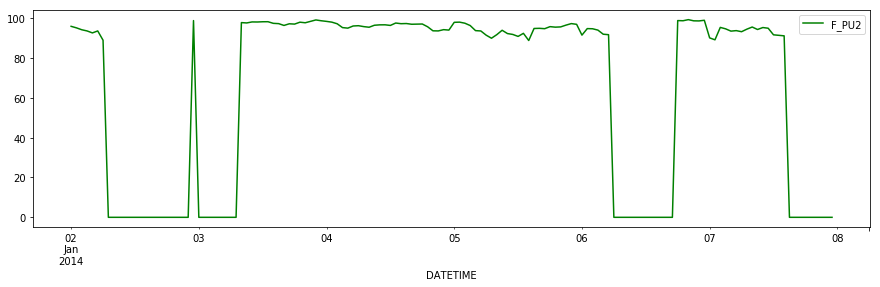

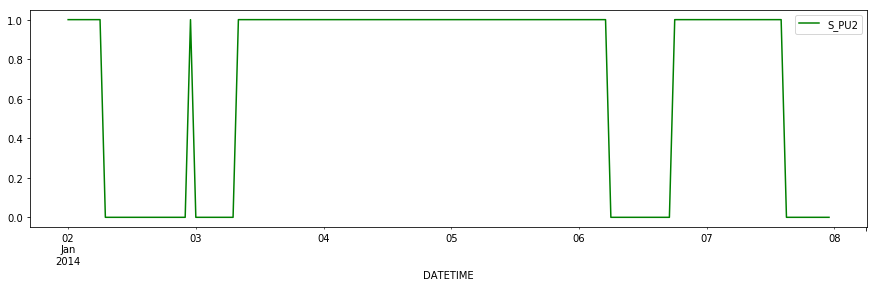

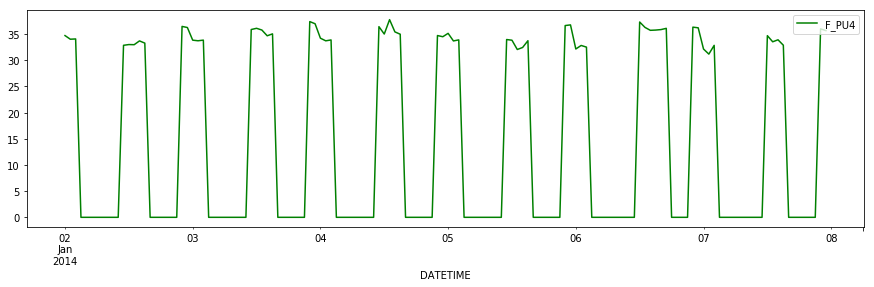

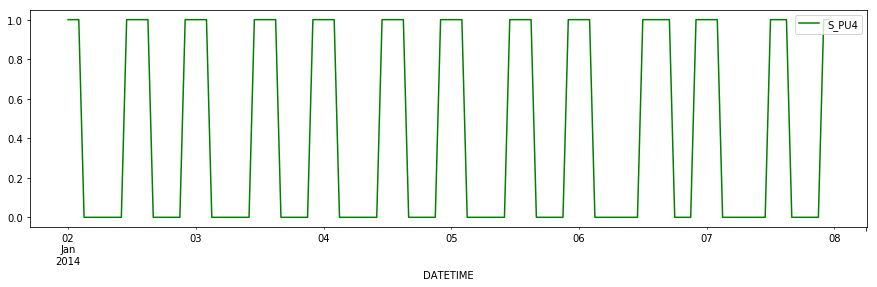

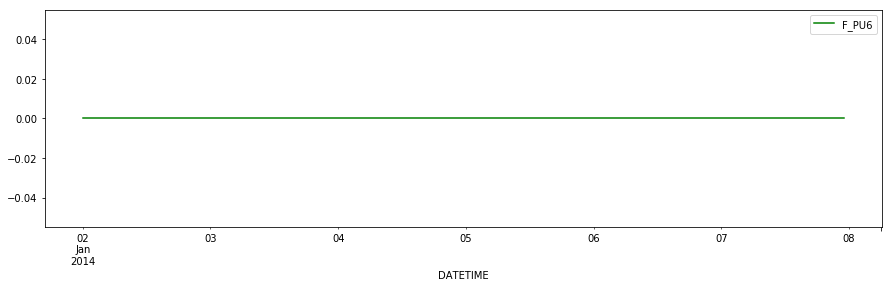

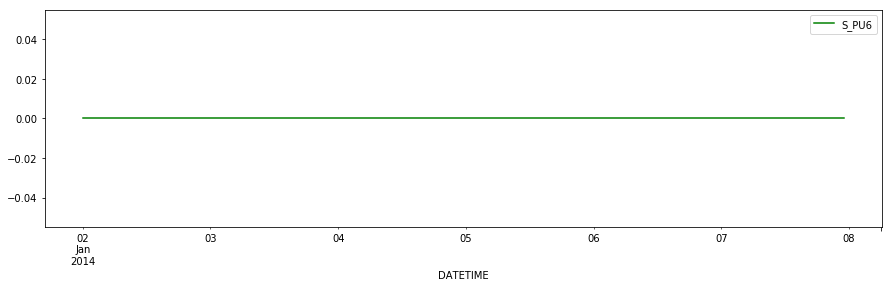

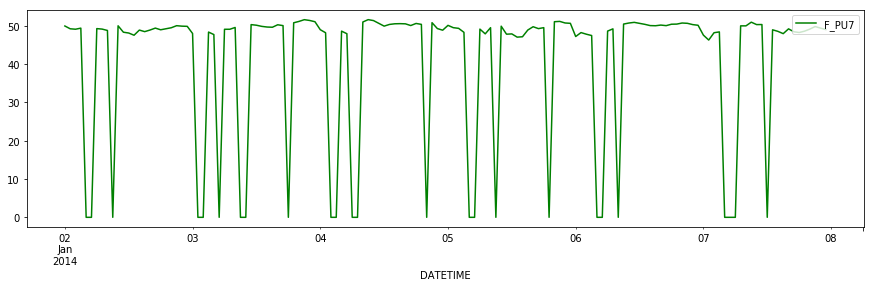

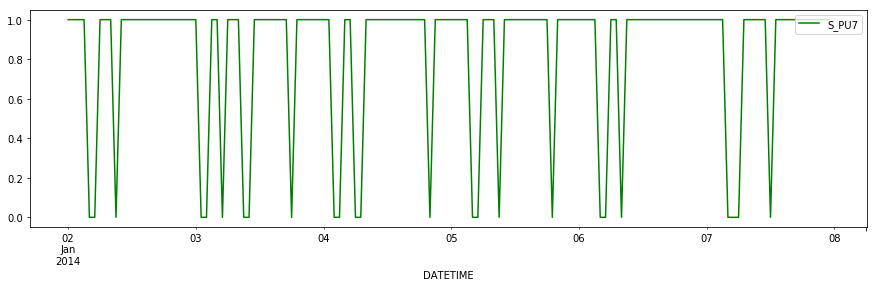

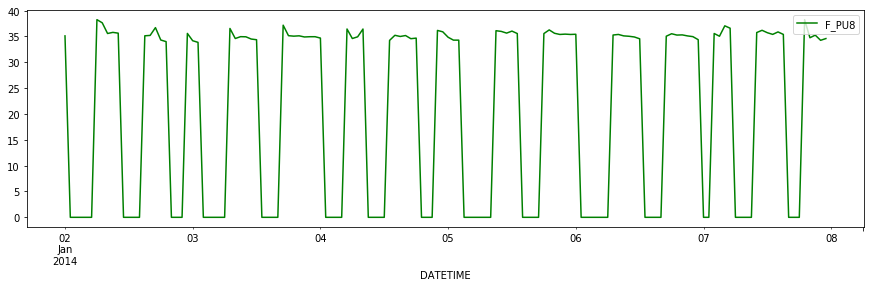

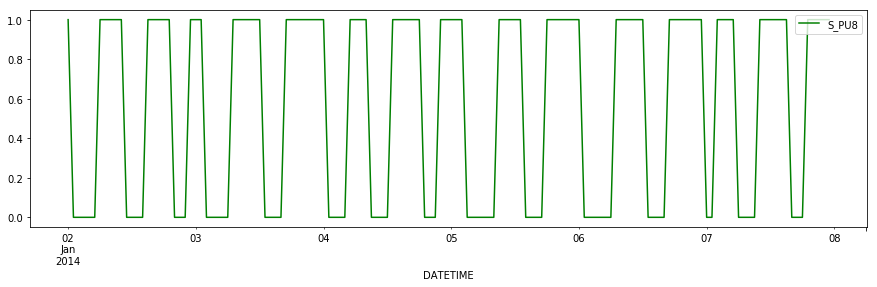

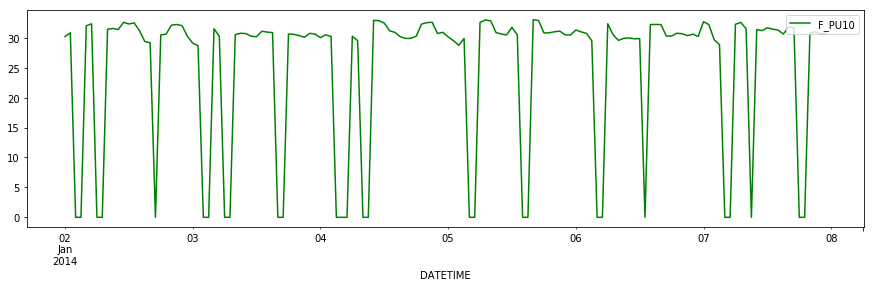

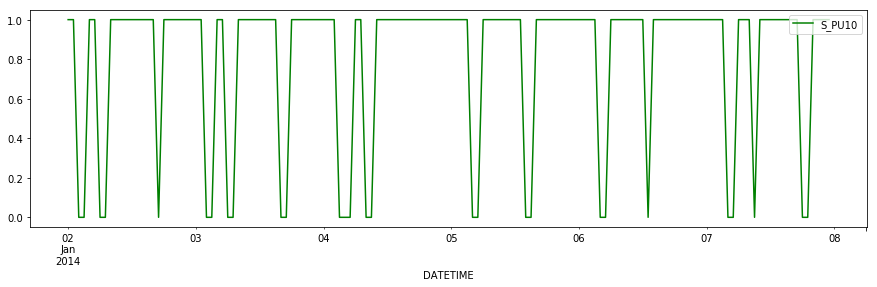

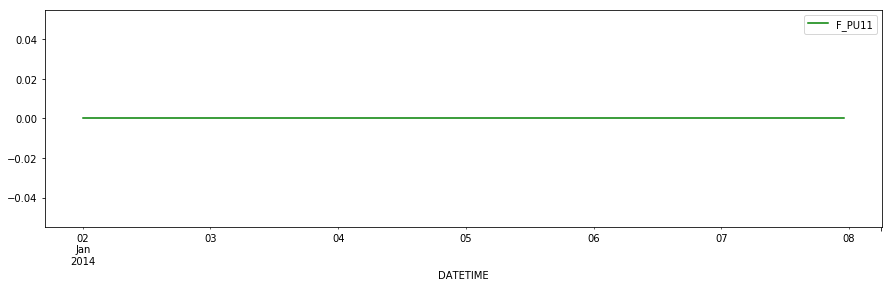

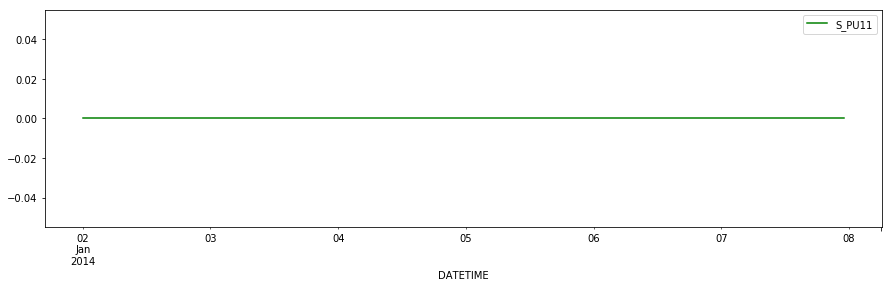

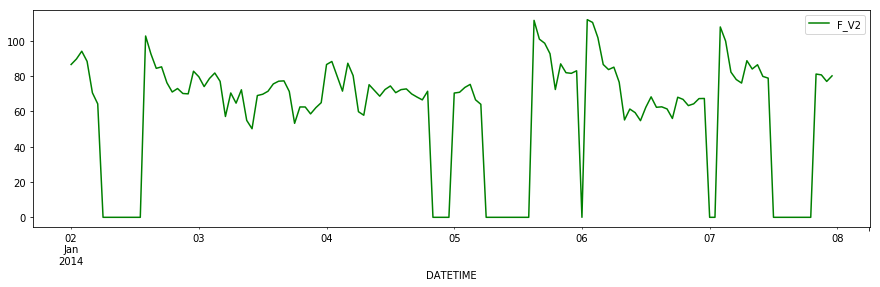

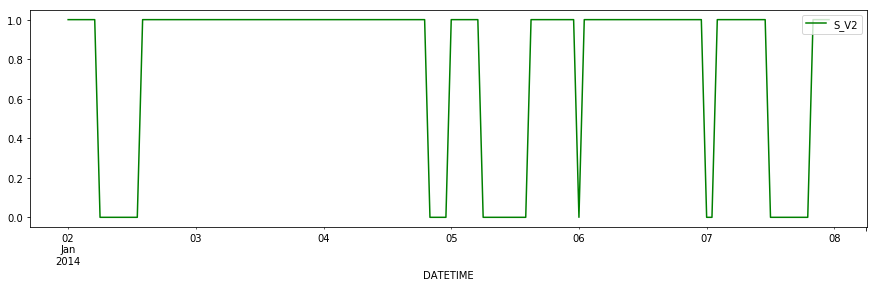

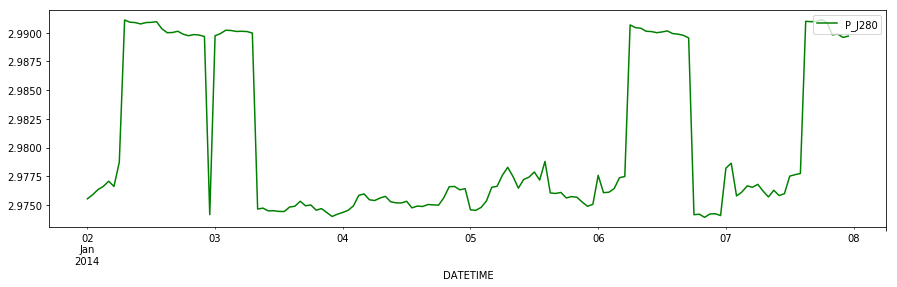

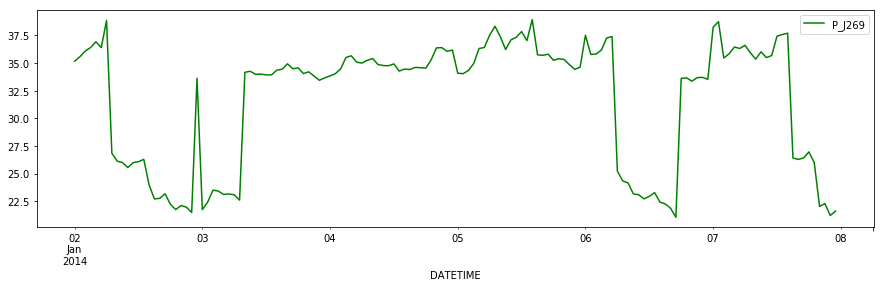

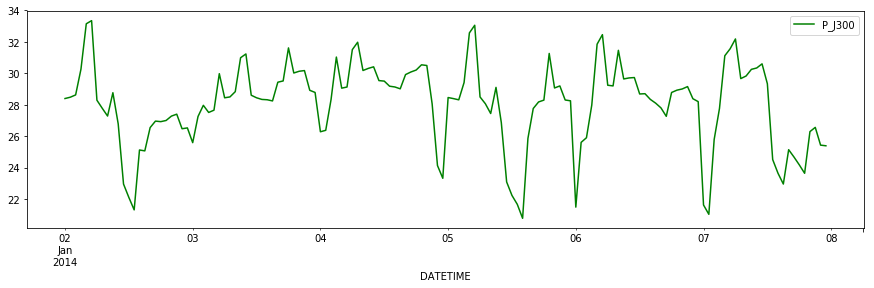

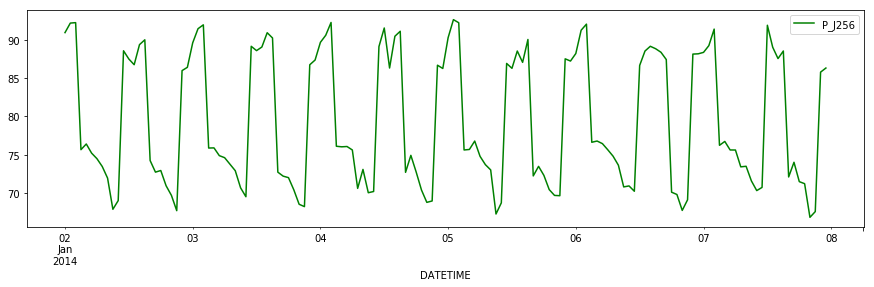

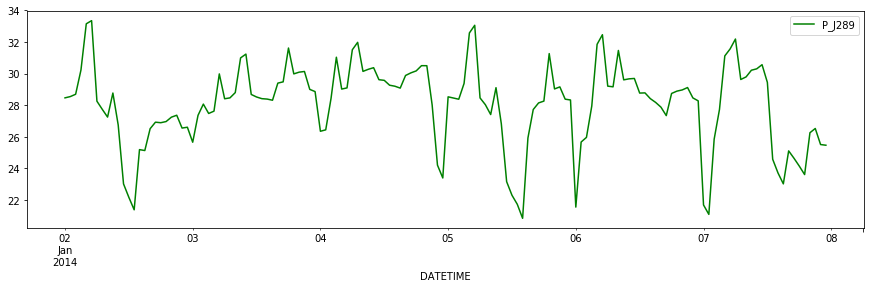

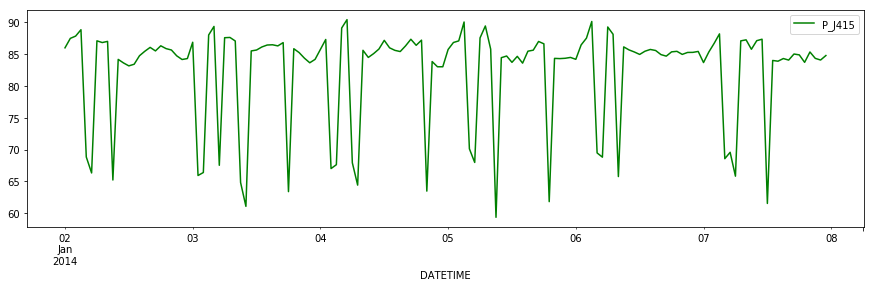

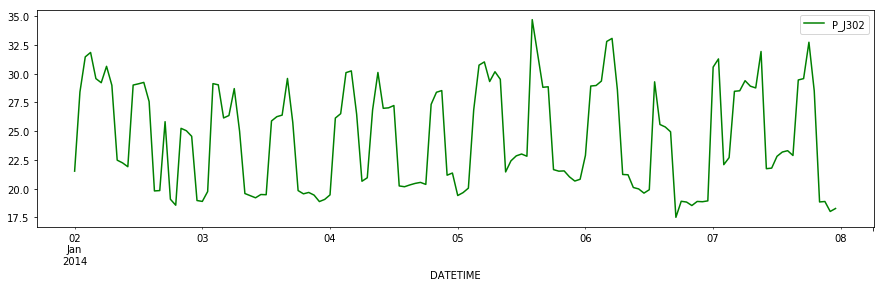

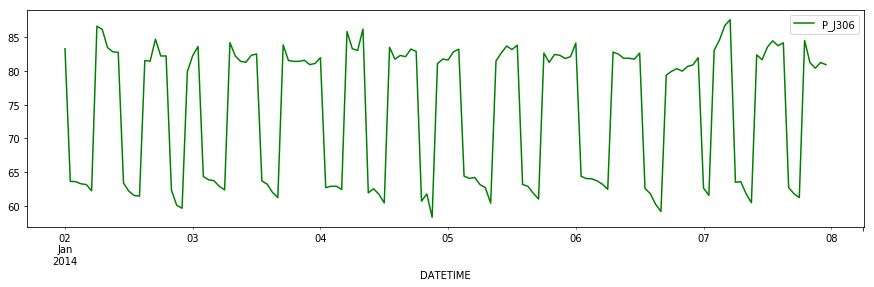

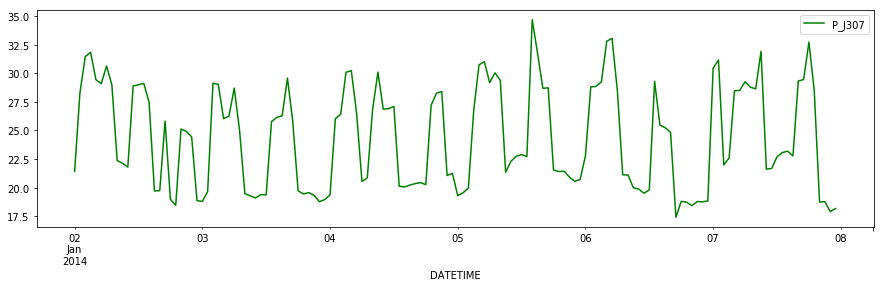

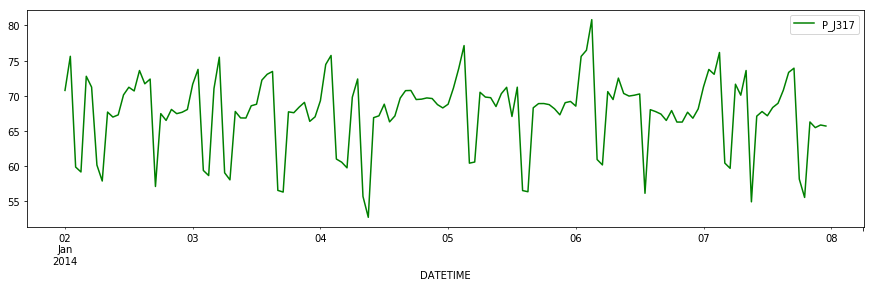

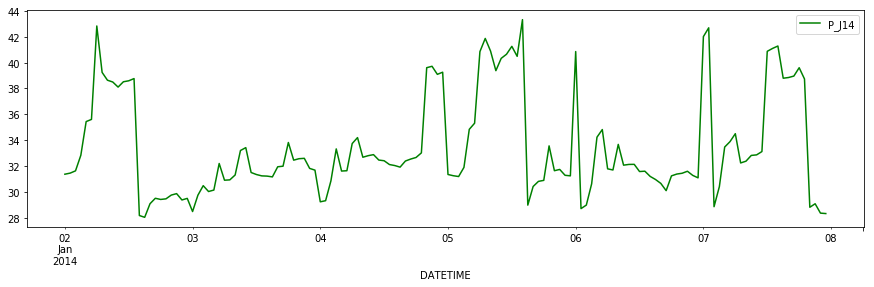

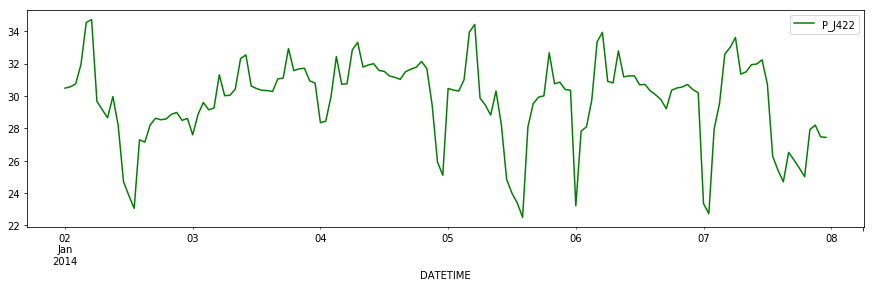

In [11]:
# Plot first 3 days of all variable data
for variable in list(corr_df):
    selected_data = training_df[training_df['DATETIME'] < '2014-01-08 00:00:00']
    ax = selected_data.plot(x='DATETIME', y=variable, figsize=(15, 4), color='green')
    ax.legend(loc='upper right');

In [12]:
## L signals: Water level signals in m. cyclic: L_T5, L_T3
## F signals: Flow signals in LPS
## S signals: cleaned threshold data from the F signals (if possible) cyclic: S_PU4
## P signals: Pressure levels

L_T1: 0.09539585054795664


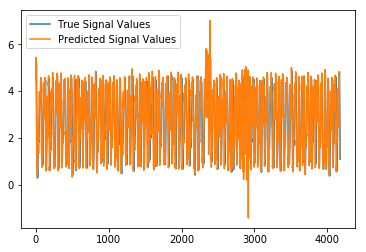

L_T2: 0.18141319137746045


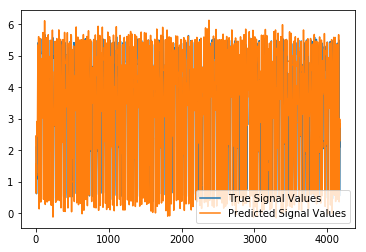

L_T3: 0.1256325190537402


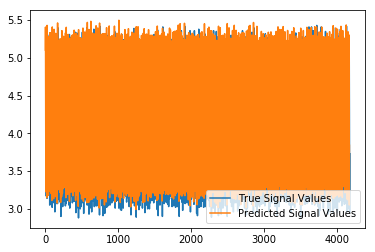

L_T4: 0.31134728387201754


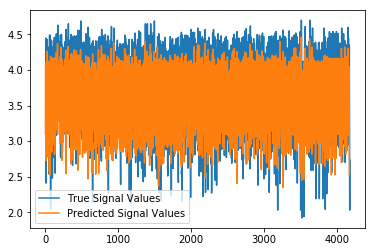

L_T5: 0.1912165701876299


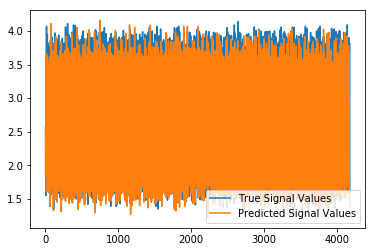

L_T6: 0.09297213709581172


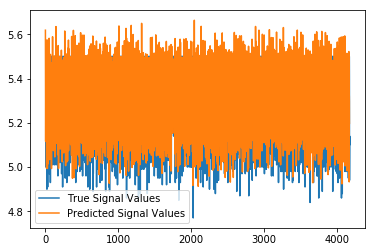

L_T7: 0.44354925113585886


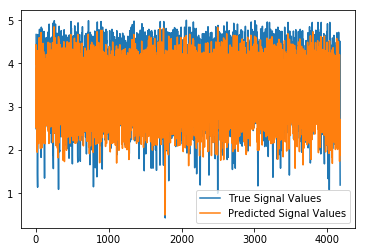

F_PU1: 2.352844963935691


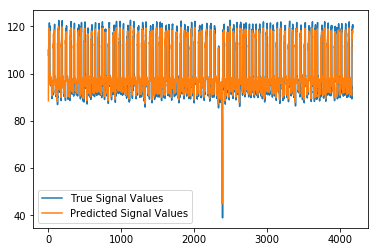

F_PU2: 7.577917706906898


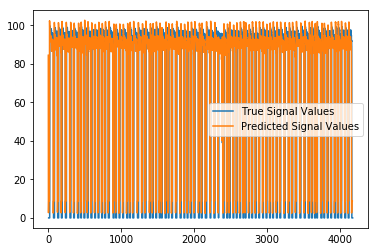

S_PU2: 0.08001003680104996


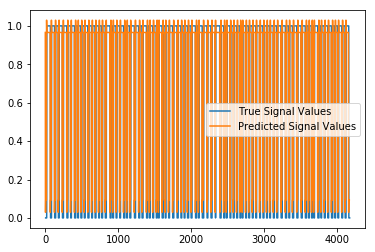

F_PU4: 7.394425443469909


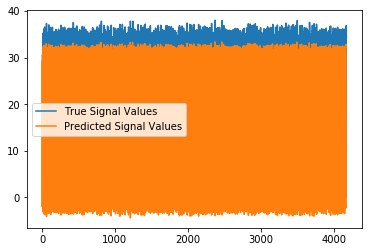

S_PU4: 0.21768532632888848


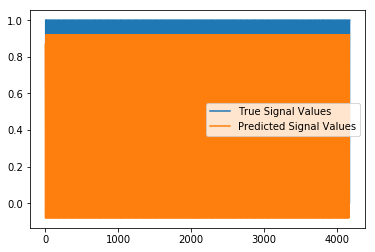

F_PU6: 1.141138185608366


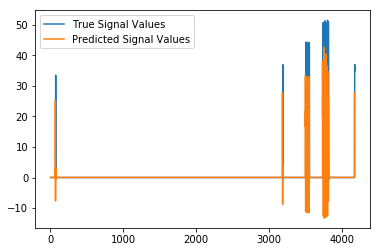

S_PU6: 0.024436398275716264


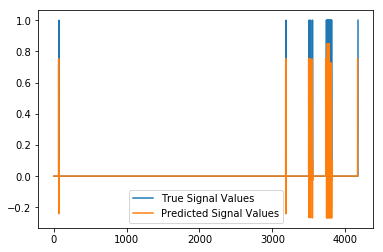

F_PU7: 13.14900305122662


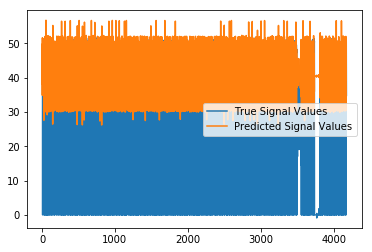

S_PU7: 0.2651462709892317


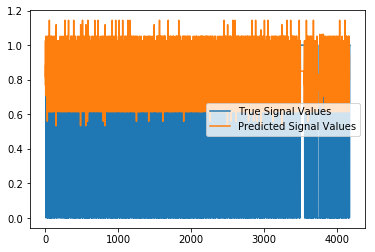

F_PU8: 9.349845282871676


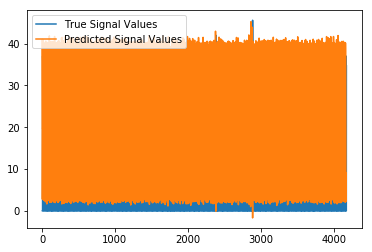

S_PU8: 0.26298938173135256


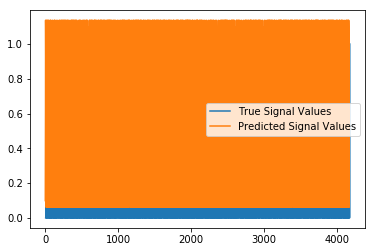

F_PU10: 8.627172097537471


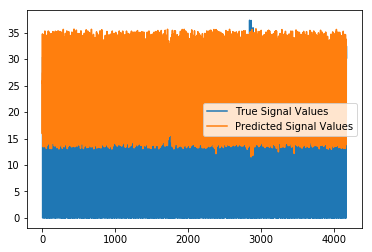

S_PU10: 0.2806271186960527


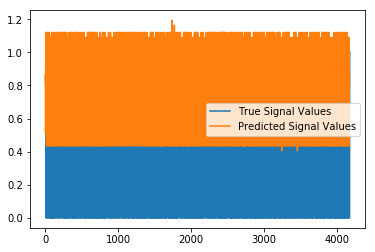

F_PU11: 0.275865476539913


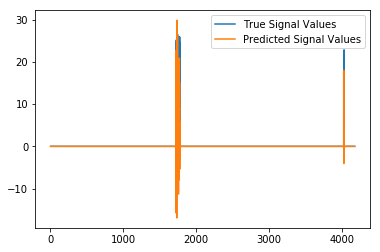

S_PU11: 0.01143615134977201


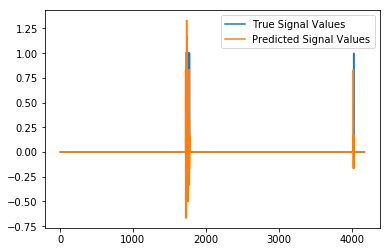

F_V2: 13.507661579419318


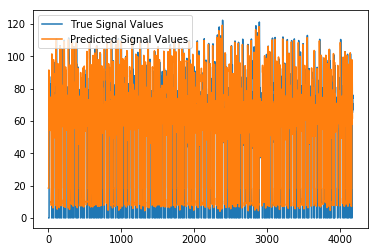

S_V2: 0.1373572812414049


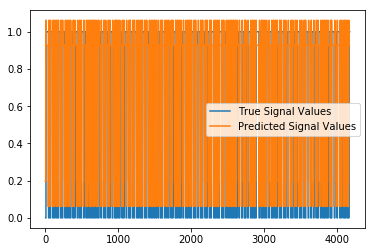

P_J280: 0.001811100543016115


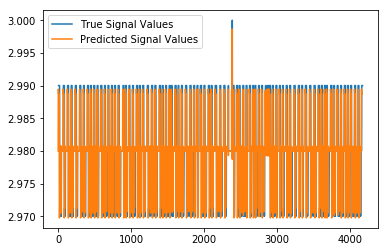

P_J269: 1.2897401093420238


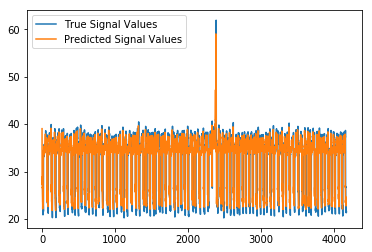

P_J300: 1.1862996925106102


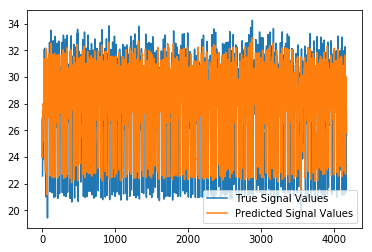

P_J256: 4.002386503967456


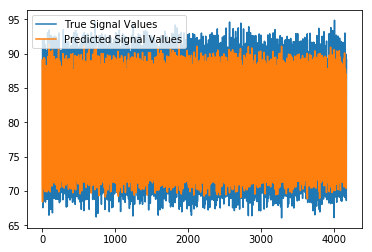

P_J289: 1.1805442598503801


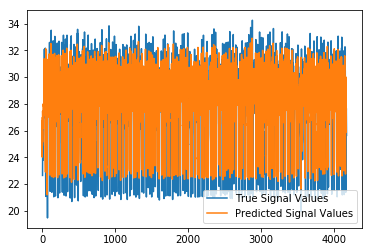

P_J415: 5.299597243144644


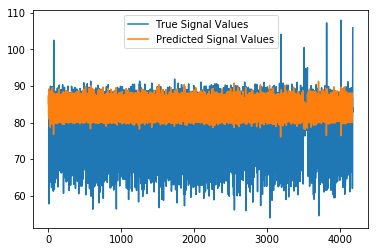

P_J302: 2.607106338690384


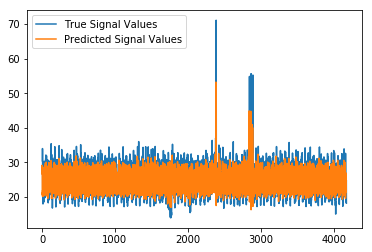

P_J306: 5.524596621248809


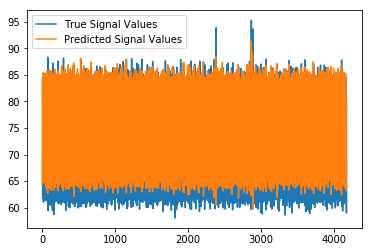

P_J307: 2.6283160161051837


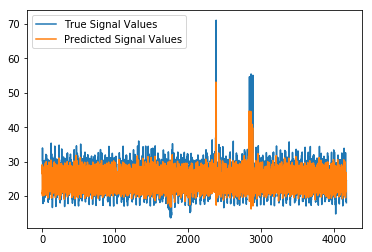

P_J317: 4.06596718587072


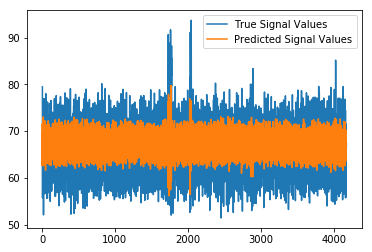

P_J14: 1.6498435440306223


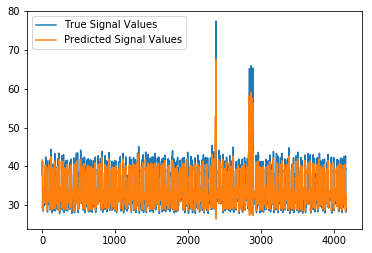

P_J422: 1.1078795676911775


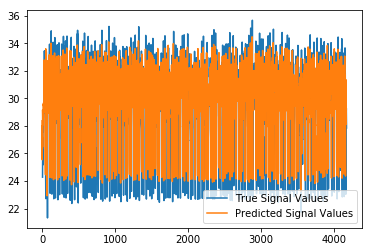

In [38]:
from statsmodels.tsa.arima_model import AR

train1 = training_df
train2 = testing_df

signal = "F_PU1"

'''
predict the next value in a time series given the history and a list of coefficients.
'''
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

for signal in list(corr_df):
    # define and fit the AR model
    p = 5
    model = AR(train1[signal])
    model_fit = model.fit(p)



    # define the test signal
    test = train2[signal]
    # obtain AR coefficients
    ar_coef = model_fit.params
    # keep the first p test signal values  
    history = [train2[signal].iloc[x] for x in range(0,p)]

    # start predicting!
    predictions = list()
    for t in range(p,len(test)):
        # next value prediction
        yhat = predict(ar_coef, history)

        # book-keeping
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)

    # compute residuals and compare to signal mean
    res = np.subtract(test[p:], predictions)
    res = res - np.mean(res)
    print(signal + ': ' + str(np.sum(np.abs(res))/len(res)))

    # plot predictions and true values
    plt.plot(train2[signal].iloc[p:])
    plt.plot(predictions)
    plt.legend(['True Signal Values','Predicted Signal Values'])
    plt.show()